<a href="https://colab.research.google.com/github/Felipej3ds/Classifica-o-de-Pokemons/blob/main/Trabalho3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Pokemons da Primeira Geração

**Instituição:** FCTE/UnB

**Disciplina:** Tópicos Especiais em Matemática Aplicada (Deep learning)

**Professor:** Vinicius Rispoli

**Alunos:**
* Felipe Junior Duarte da Silva (231012192)
* Rafael Welz Schadt (231011800)
* Othavio Araujo Bolzan (231039150)

**Data de Entrega:** 13 de Dezembro de 2025

## 1. Introdução

### 1.1 Objetivo do Trabalho

O objetivo central deste trabalho é o desenvolvimento e avaliação de um sistema de classificação multiclasse de granularidade fina (fine-grained classification) capaz de identificar as 151 espécies de Pokémon da Primeira Geração.

Este projeto aborda um desafio significativo em Visão Computacional: processar um dataset extenso e altamente categorizado. O conjunto de dados utilizado compreende mais de 10.000 imagens, estruturadas em 151 classes distintas, com aproximadamente 60 imagens por Pokémon.

A tarefa não exige apenas o reconhecimento de classes, mas a distinção entre entidades visualmente similares, demandando a aplicação de modelos robustos de Deep Learning, como a arquitetura EfficientNetV2 combinada com Transfer Learning e Fine-Tuning, para extrair e refinar características visuais complexas.


### 1.2 Estrutura do Relatório



O restante deste relatório, desenvolvido e apresentado no formato de Jupyter Notebook, descreve de forma detalhada a metodologia adotada, os experimentos realizados e os resultados obtidos no desenvolvimento de um modelo de classificação de imagens de Pokémon da primeira geração. A Seção 2 – Metodologia e Pipeline de Dados apresenta as etapas de configuração do ambiente, a preparação e divisão do conjunto de dados, bem como a definição do modelo baseado em Transfer Learning com a arquitetura ResNet18, incluindo o processo de treinamento e otimização. A Seção 3 – Resultados contempla a análise do desempenho do modelo por meio de curvas de aprendizado, métricas de classificação, matriz de confusão, avaliação Top-K e inferência visual. Por fim, a Seção 4 – Upload de Imagem e Predição do Pokémon demonstra a aplicação prática do modelo treinado em imagens externas, incluindo a análise das previsões mais prováveis e um critério de confiança para identificar imagens que possivelmente não pertencem ao domínio do conjunto de dados.



**Sumário**


- 1. Introdução
  - 1.1. Objetivo do Trabalho
  - 1.2. Estrutura do Relatório

- 2. Metodologia e Pipeline de Dados
  - 2.1. Configuração Inicial e Imports
  - 2.2. Preparação de Dados
    - 2.2.1. Definição das Transformações
    - 2.2.2. Implementação do Dataset Customizado
    - 2.2.3. Organização das Classes e Rotulagem

  - 2.3. Divisão dos Dados
    - 2.3.1. Conjunto de Treinamento
    - 2.3.2. Conjunto de Validação
    - 2.3.3. Conjunto de Teste

  - 2.4. Modelo Baseado em Transfer Learning
    - 2.4.1. Arquitetura ResNet18 Pré-Treinada
    - 2.4.2. Adaptação da Camada de Classificação

  - 2.5. Otimizadores e Processo de Treinamento
    - 2.5.1. Função de Perda e Otimizador
    - 2.5.2. Estratégia de Treinamento e Validação
    - 2.5.3. Salvamento do Modelo Treinado

- 3. Resultados
  - 3.1. Curvas de Aprendizado
  - 3.2. Avaliação no Conjunto de Teste
    - 3.2.1. Relatório de Classificação
    - 3.2.2. Matriz de Confusão

  - 3.3. Avaliação Top-K e Inferência Visual

- 4. Upload de Imagem e Predição do Pokémon
  - 4.1. Classificação de Imagens Externas
  - 4.2. Análise das Predições Top-2
  - 4.3. Critério de Confiança para Detecção de “Não Pokémon”

- 5. Conclusão

- 6. Referências Bibliográficas

### 1.3 Ferramentas Utilizadas

O projeto de classificação automática de Pokémon da Primeira Geração foi desenvolvido utilizando a linguagem de programação Python 3, sendo executado em ambiente de notebooks interativos baseados em nuvem, especificamente o Google Colab.

As principais ferramentas empregadas ao longo do desenvolvimento do projeto são descritas a seguir:

- Ambiente Computacional e Gerenciamento de Dados:
Foram utilizadas bibliotecas padrão da linguagem Python, como os, shutil e pathlib, para o gerenciamento do sistema de arquivos, organização dos diretórios e manipulação das estruturas do dataset. A biblioteca numpy foi empregada para operações numéricas e apoio ao processamento de dados, enquanto o download e a organização do conjunto de dados foram realizados por meio da biblioteca kagglehub, permitindo o acesso direto ao dataset hospedado na plataforma Kaggle.

- Pré-processamento e Manipulação de Imagens:
A biblioteca Pillow (PIL) foi utilizada para o carregamento e tratamento inicial das imagens. O módulo torchvision.transforms foi empregado na definição das transformações aplicadas aos dados, incluindo redimensionamento das imagens, normalização e técnicas de data augmentation, tais como rotações, espelhamento horizontal e ajustes de brilho e contraste, utilizadas para aumentar a robustez do modelo durante o treinamento.

- Núcleo de Deep Learning:
O framework PyTorch constitui o núcleo do desenvolvimento do modelo de Aprendizado Profundo. Por meio dos módulos torch, torch.nn e torch.optim, foi possível definir a arquitetura da rede neural, a função de perda, os otimizadores e o processo de treinamento. O módulo torchvision.models foi utilizado para a aplicação de Transfer Learning, permitindo o uso da arquitetura ResNet18 pré-treinada, adaptada para o número de classes do problema em estudo.

- Carregamento e Gerenciamento de Dados em Lote:
As classes Dataset e DataLoader do PyTorch foram empregadas para a implementação de um dataset customizado e para o carregamento das imagens em lotes (batches), possibilitando melhor aproveitamento dos recursos computacionais durante as fases de treinamento, validação e teste.

- Avaliação e Métricas de Desempenho:
A biblioteca scikit-learn, por meio do módulo sklearn.metrics, foi utilizada para o cálculo das métricas de avaliação do modelo, incluindo acurácia, precisão, recall, F1-score e a matriz de confusão, permitindo uma análise do desempenho do classificador no conjunto de teste.

- Visualização de Resultados:
As bibliotecas matplotlib.pyplot e seaborn foram utilizadas para a geração de gráficos e representações visuais, como curvas de perda, curvas de acurácia e matrizes de confusão, auxiliando na interpretação dos resultados e no acompanhamento do processo de aprendizado do modelo ao longo das épocas de treinamento.

## 2. Metodologia e Pipeline de Dados





Esta seção descreve de forma estruturada o pipeline completo adotado para a construção do sistema de classificação de imagens, abrangendo desde a configuração do ambiente computacional e preparação dos dados até o treinamento do modelo, avaliação de desempenho e aplicação prática em imagens externas.

### 2.1 Configuração Inicial e Imports

Este tópico apresenta a configuração inicial do ambiente de desenvolvimento, incluindo a instalação e importação das bibliotecas necessárias para manipulação de dados, processamento de imagens, visualização e implementação de modelos de Aprendizado Profundo. Além disso, é definida a utilização do dispositivo computacional, priorizando o uso de GPU quando disponível, e é realizado o download e a organização do dataset de imagens de Pokémon a partir da plataforma Kaggle.

In [ ]:
# Célula 1: Instalação e Imports
!pip install kagglehub torch torchvision scikit-learn matplotlib seaborn pandas -q

import kagglehub
import os
import shutil
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# 1. Baixar o dataset
print("Baixando dataset...")
path_download = kagglehub.dataset_download("thedagger/pokemon-generation-one")
print("Dataset baixado em:", path_download)


data_dir = Path(path_download) / "dataset"

if not data_dir.exists():
    data_dir = Path(path_download)

Usando dispositivo: cuda
Baixando dataset...
Using Colab cache for faster access to the 'pokemon-generation-one' dataset.
Dataset baixado em: /kaggle/input/pokemon-generation-one


### 2.2 Preparação de Dados

Nesta etapa é descrito o processo de preparação do conjunto de dados, incluindo a definição das transformações aplicadas às imagens e a implementação de um dataset customizado. São utilizadas técnicas de data augmentation no conjunto de treinamento, com o objetivo de aumentar a variabilidade dos dados e melhorar a capacidade de generalização do modelo. Também é realizada a organização das classes e a associação entre rótulos numéricos e nomes das categorias.

In [ ]:
# Célula 2: Definição das Transformações e Dataset Customizado

# Definição das transformações
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class PokemonDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Listar todas as imagens e classes
image_paths = []
labels = []
class_names = sorted([d.name for d in data_dir.iterdir() if d.is_dir()])
class_to_idx = {cls_name: i for i, cls_name in enumerate(class_names)}

for cls_name in class_names:
    cls_dir = data_dir / cls_name
    for img_path in cls_dir.glob("*"):
        if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
            image_paths.append(str(img_path))
            labels.append(class_to_idx[cls_name])

print(f"Total de imagens encontradas: {len(image_paths)}")
print(f"Total de classes: {len(class_names)}")

Total de imagens encontradas: 10657
Total de classes: 150


### 2.3 Divisão de Dados


Este tópico aborda a estratégia de divisão do dataset em conjuntos de treinamento, validação e teste. A separação é realizada de forma estratificada, garantindo a preservação da distribuição das classes em todos os subconjuntos. Essa abordagem permite um treinamento adequado do modelo, acompanhamento do desempenho durante a validação e uma avaliação final imparcial no conjunto de teste.

In [ ]:
# Célula 3: Split dos dados
# Primeiro divide em Treino (70%) e Resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, stratify=labels, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Criar os Datasets
train_dataset = PokemonDataset(X_train, y_train, transform=train_transforms)
val_dataset = PokemonDataset(X_val, y_val, transform=val_transforms)
test_dataset = PokemonDataset(X_test, y_test, transform=val_transforms)

# Criar os DataLoaders (Carregam os dados em lotes para a GPU)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Treino: {len(train_dataset)}, Validação: {len(val_dataset)}, Teste: {len(test_dataset)}")

Treino: 7459, Validação: 1599, Teste: 1599


### 2.4 Modelo Transfer Learning

Nesta seção é apresentada a definição do modelo de classificação utilizando a técnica de Transfer Learning. É empregada a arquitetura ResNet18 pré-treinada, originalmente ajustada para o dataset ImageNet, cuja camada final é substituída para se adequar ao número de classes do problema. Essa estratégia permite aproveitar representações previamente aprendidas, reduzindo o tempo de treinamento e melhorando o desempenho em conjuntos de dados relativamente pequenos.

In [ ]:
# Célula 4: Definição do Modelo
def get_model(num_classes):
    # Carrega a ResNet18 pré-treinada
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)

    return model

model = get_model(len(class_names))
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 55.7MB/s]


### 2.5 Otimizadores e Treinamento

Este tópico descreve a configuração do processo de treinamento do modelo, incluindo a definição da função de perda, do otimizador e do número de épocas. O treinamento é realizado de forma iterativa, com atualização dos pesos por meio de retropropagação do erro, enquanto o desempenho é monitorado a cada época utilizando o conjunto de validação. Ao final do processo, o modelo treinado é salvo para posterior reutilização.

In [ ]:
# Célula 5: Configuração de Treinamento
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f"Época {epoch+1}/{num_epochs}")

        # --- Fase de Treino ---
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)

        # --- Fase de Validação ---
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = correct / total
        val_acc_history.append(val_acc)

        print(f"Loss Treino: {epoch_loss:.4f} | Acurácia Validação: {val_acc:.4f}")

    return model, train_loss_history, val_acc_history

# Treinar o modelo
trained_model, loss_hist, acc_hist = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=12
)

torch.save(trained_model.state_dict(), "best_pokemon_model.pt")
print("Modelo salvo como best_pokemon_model.pt!")

Época 1/12


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loss Treino: 3.4938 | Acurácia Validação: 0.6198
Época 2/12
Loss Treino: 1.6033 | Acurácia Validação: 0.7674
Época 3/12
Loss Treino: 0.8765 | Acurácia Validação: 0.8068
Época 4/12
Loss Treino: 0.5508 | Acurácia Validação: 0.8136
Época 5/12
Loss Treino: 0.3635 | Acurácia Validação: 0.8224
Época 6/12
Loss Treino: 0.2593 | Acurácia Validação: 0.8236
Época 7/12
Loss Treino: 0.2056 | Acurácia Validação: 0.8311
Época 8/12
Loss Treino: 0.1587 | Acurácia Validação: 0.8261
Época 9/12
Loss Treino: 0.1335 | Acurácia Validação: 0.8261
Época 10/12
Loss Treino: 0.1216 | Acurácia Validação: 0.8299
Época 11/12
Loss Treino: 0.1138 | Acurácia Validação: 0.8311
Época 12/12
Loss Treino: 0.0961 | Acurácia Validação: 0.8280
Modelo salvo como best_pokemon_model.pt!


## 3. Resultados

Esta seção apresenta os principais resultados obtidos a partir do treinamento e avaliação do modelo, permitindo analisar seu comportamento ao longo das épocas e seu desempenho final no conjunto de teste.
Neste tópico são apresentadas as curvas de perda e acurácia ao longo do treinamento, permitindo avaliar a evolução do aprendizado do modelo e identificar possíveis indícios de overfitting ou underfitting. Essas visualizações auxiliam na compreensão da estabilidade e da eficiência do processo de treinamento. Esta etapa contempla a avaliação final do modelo utilizando o conjunto de teste, que não foi visto durante o treinamento. São calculadas métricas de desempenho, como precisão, recall, F1-score e matriz de confusão, proporcionando uma análise detalhada da capacidade de classificação do modelo para cada classe.

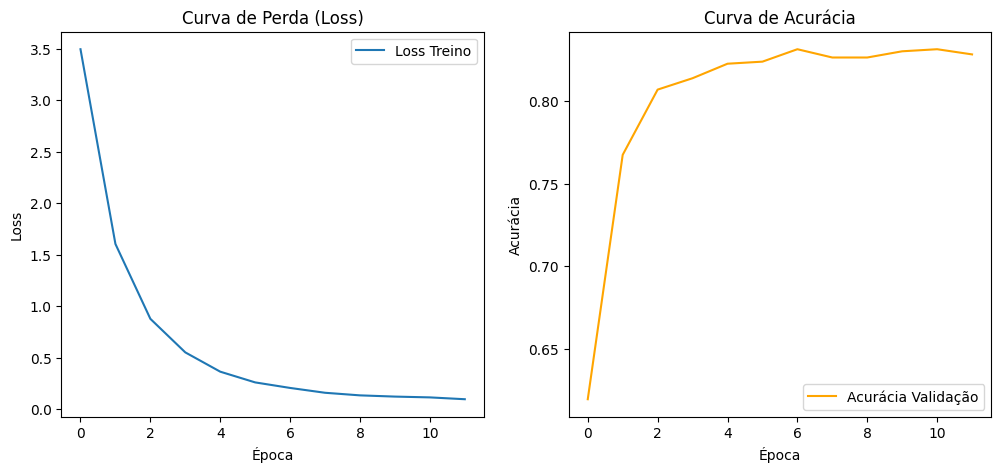

              precision    recall  f1-score   support

        Abra       1.00      1.00      1.00         6
  Aerodactyl       0.82      1.00      0.90        14
    Alakazam       0.71      0.71      0.71         7
       Arbok       0.91      1.00      0.95        10
    Arcanine       0.75      1.00      0.86         9
    Articuno       0.90      1.00      0.95         9
    Beedrill       1.00      0.88      0.93         8
  Bellsprout       1.00      1.00      1.00         8
   Blastoise       0.89      0.80      0.84        10
   Bulbasaur       0.93      0.93      0.93        43
  Butterfree       0.88      0.70      0.78        10
    Caterpie       1.00      1.00      1.00         7
     Chansey       1.00      1.00      1.00         8
   Charizard       1.00      0.50      0.67         8
  Charmander       0.84      0.96      0.90        45
  Charmeleon       0.73      0.80      0.76        10
    Clefable       0.56      0.71      0.62         7
    Clefairy       0.71    

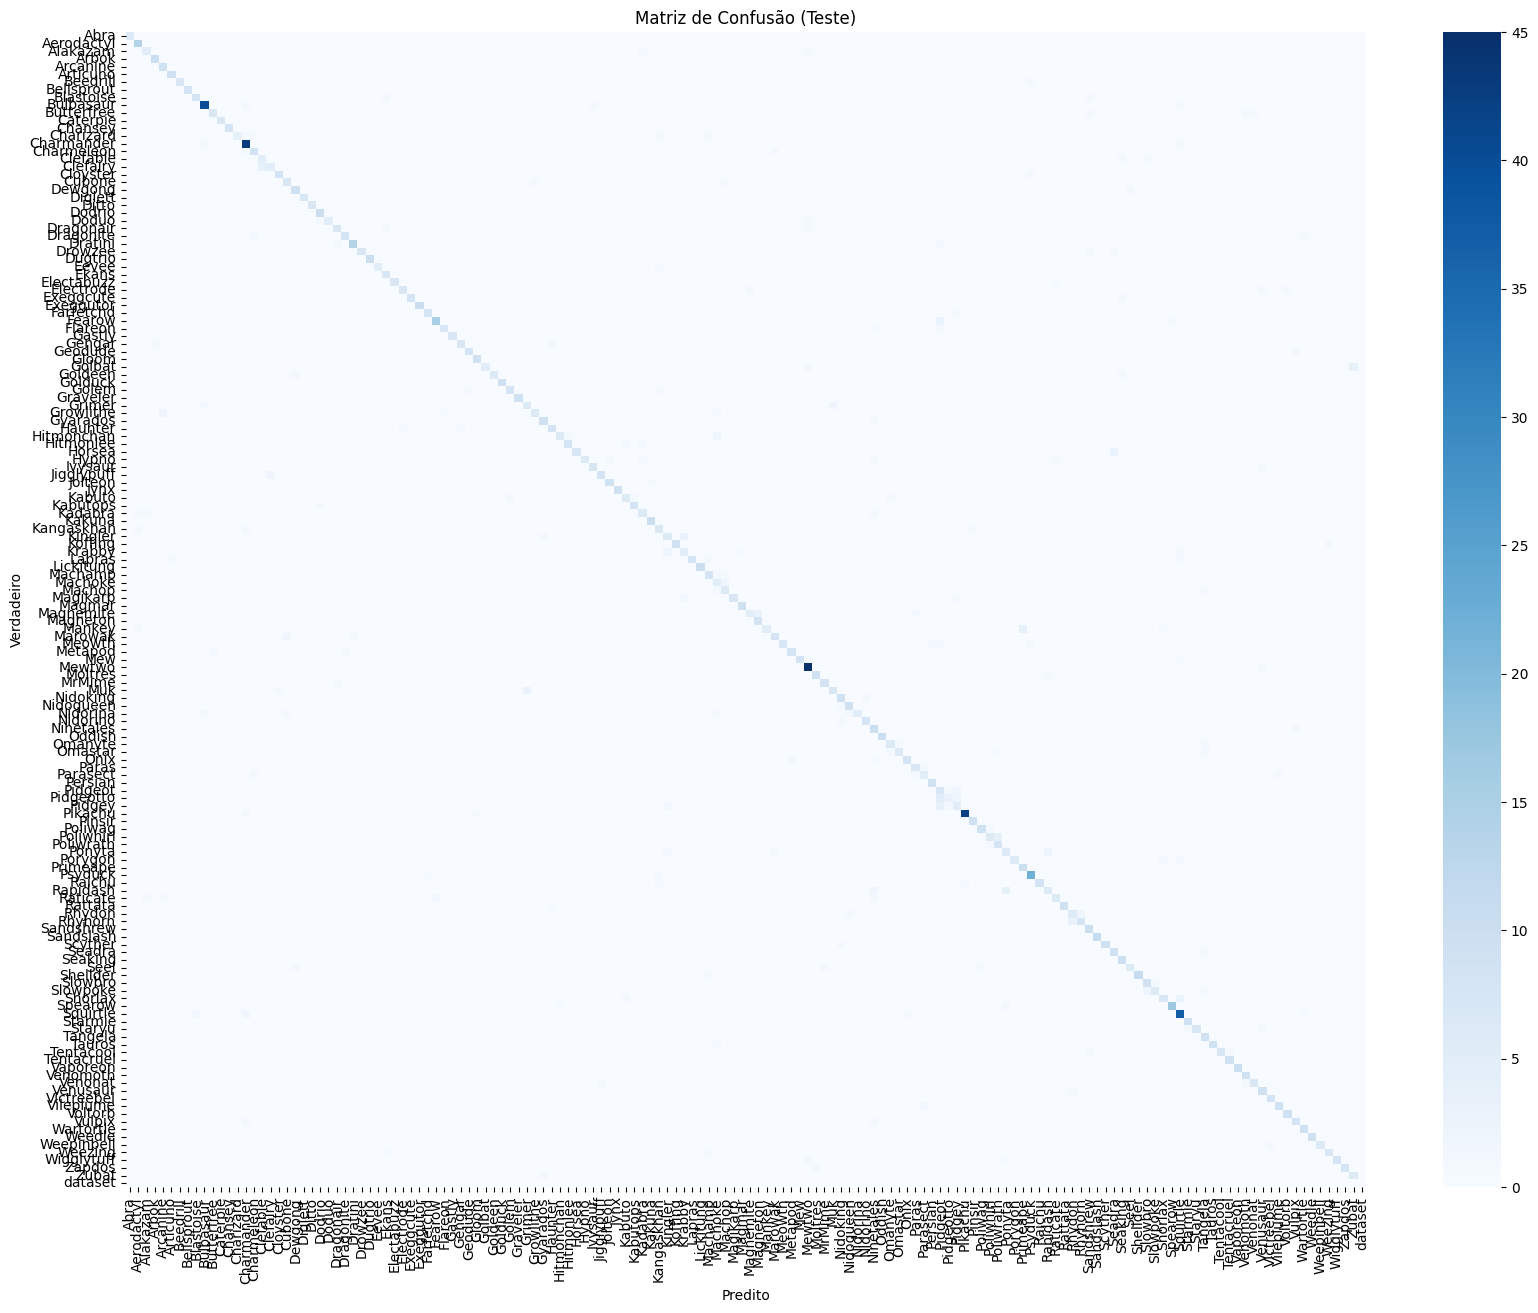

In [ ]:
# Célula 6: Visualização dos Gráficos de Aprendizado
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_hist, label='Loss Treino')
plt.title('Curva de Perda (Loss)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_hist, color='orange', label='Acurácia Validação')
plt.title('Curva de Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Célula 7: Avaliação no Dataset de Teste e Matriz de Confusão
def evaluate_test(model, test_loader, classes):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    all_labels = list(range(len(classes)))

    # Relatório
    print(classification_report(
        y_true,
        y_pred,
        labels=all_labels,
        target_names=classes,
        zero_division=0
    ))

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)
    plt.figure(figsize=(20, 15))
    sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão (Teste)')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()

evaluate_test(trained_model, test_loader, class_names)

### 3.1 Top-K e Inferência Visual

Neste tópico é realizada a avaliação do modelo considerando métricas Top-K, que verificam se a classe correta está entre as K predições mais prováveis. Além disso, são apresentados exemplos de inferência visual, nos quais imagens do conjunto de teste são classificadas e exibidas juntamente com suas previsões e níveis de confiança, facilitando a interpretação qualitativa dos resultados.

Calculando métricas no conjunto de TESTE...

=== Resultados Finais ===
Top-1 Accuracy: 83.99%
Top-5 Accuracy: 96.81%

Exemplos de Predições:


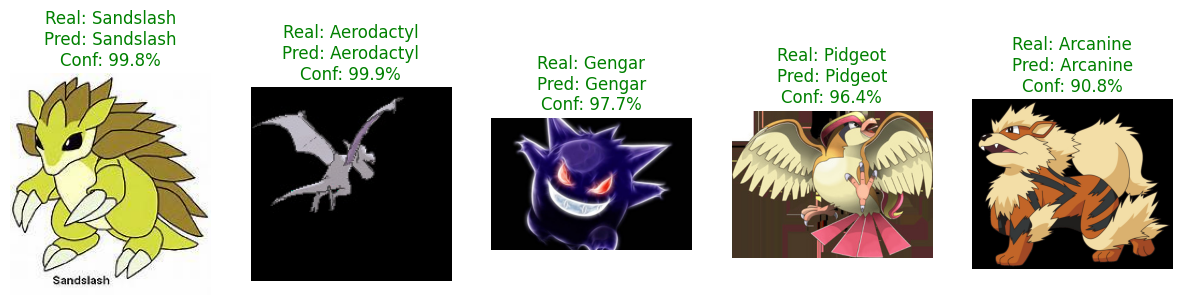

In [ ]:
# Célula 8: Avaliação Final e Inferência Visual

import random

def calculate_topk_accuracy(loader, model, k=5):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)

            _, topk_preds = outputs.topk(k, 1, True, True)
            topk_preds = topk_preds.t()

            correct_k = topk_preds.eq(labels.view(1, -1).expand_as(topk_preds))
            correct += correct_k[:k].reshape(-1).float().sum(0).item()
            total += labels.size(0)
    return correct / total


model.load_state_dict(torch.load("best_pokemon_model.pt"))
model.to(device)

print("Calculando métricas no conjunto de TESTE...")
acc_top1 = calculate_topk_accuracy(test_loader, model, k=1)
acc_top5 = calculate_topk_accuracy(test_loader, model, k=5)

print(f"\n=== Resultados Finais ===")
print(f"Top-1 Accuracy: {acc_top1*100:.2f}%")
print(f"Top-5 Accuracy: {acc_top5*100:.2f}%")


# --- Inferência Visual ---
def predict_and_show(dataset, model, count=5):
    model.eval()
    indices = random.sample(range(len(dataset)), count)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        img_path = dataset.file_paths[idx]
        true_label = dataset.labels[idx]

        img_pil = Image.open(img_path).convert("RGB")
        img_tensor = val_transforms(img_pil).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(img_tensor)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            conf, pred = torch.max(probs, 1)

        plt.subplot(1, count, i+1)
        plt.imshow(img_pil)
        plt.axis('off')

        color = 'green' if pred.item() == true_label else 'red'
        title = (
            f"Real: {class_names[true_label]}\n"
            f"Pred: {class_names[pred.item()]}\n"
            f"Conf: {conf.item():.1%}"
        )
        plt.title(title, color=color)

    plt.show()


print("\nExemplos de Predições:")
predict_and_show(test_dataset, model)


## 4. Upload de imagem e predição do Pokémon

Esta seção demonstra a aplicação prática do modelo treinado em imagens externas fornecidas pelo usuário. O sistema realiza a classificação considerando as duas classes mais prováveis (Top-2) e aplica um critério de confiança mínima para indicar quando uma imagem possivelmente não representa um Pokémon da Primeira Geração. Essa abordagem amplia a robustez do sistema em cenários reais de uso.

Saving images.jpg to images.jpg

Classificando imagem: images.jpg


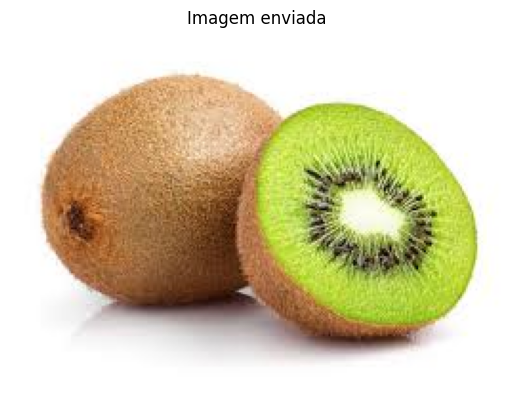

Previsões do Modelo:
Exeggcute — 7.62%
Pidgey — 3.50%

A confiança está abaixo.
A imagem pode não representar nenhum Pokémon da Primeira Geração.


In [ ]:
# Célula 9 — Classificação com TOP-2 + alerta para "não é Pokémon"

from google.colab import files
import torch.nn.functional as F

def predict_image(model, image_path, transform, class_names, threshold=0.75):
    model.eval()

    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        probs = F.softmax(outputs, dim=1).cpu().numpy().flatten()

    # Top-2 previsões
    top2_idx = probs.argsort()[::-1][:2]
    top1_idx, top2_idx = top2_idx[0], top2_idx[1]

    top1_prob = probs[top1_idx]
    top2_prob = probs[top2_idx]

    top1_name = class_names[top1_idx]
    top2_name = class_names[top2_idx]

    plt.imshow(img)
    plt.axis("off")
    plt.title("Imagem enviada")
    plt.show()

    print("Previsões do Modelo:")
    print(f"{top1_name} — {top1_prob*100:.2f}%")
    print(f"{top2_name} — {top2_prob*100:.2f}%\n")

    # DETECÇÃO DE "NÃO É POKÉMON"
    if top1_prob < threshold:
        print("A confiança está abaixo.")
        print("A imagem pode não representar nenhum Pokémon da Primeira Geração.")
    else:
        print(f"Pokémon mais provável: {top1_name} (confiança: {top1_prob*100:.2f} por cento)")

    return top1_name, top1_prob


# --- UPLOAD DA IMAGEM ---
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\nClassificando imagem: {filename}")
    predict_image(
        trained_model,
        filename,
        val_transforms,
        class_names,
        threshold=0.75
    )


## 5. Conclusão


O presente trabalho alcançou com êxito o objetivo de desenvolver um sistema de classificação multiclasse de granularidade fina capaz de identificar as 151 espécies de Pokémon da Primeira Geração. Através da aplicação de técnicas de Deep Learning e Visão Computacional, foi possível processar um dataset desafiador e construir um modelo robusto.

A metodologia adotada, fundamentada em Transfer Learning com a arquitetura ResNet18 pré-treinada, mostrou-se altamente eficaz para o problema. O uso de data augmentation e o ajuste fino (fine-tuning) da rede permitiram que o modelo aprendesse características visuais complexas e generalizasse bem, mesmo com um número limitado de imagens por classe.

Os resultados obtidos validam a abordagem escolhida:

- O modelo atingiu uma Acurácia Top-1 de 83,99%, demonstrando uma alta capacidade de acerto direto da espécie correta.

- A Acurácia Top-5 de 96,81% indica que o modelo raramente falha em incluir a classe verdadeira entre as suas principais suposições, o que é um indicador forte de aprendizado consistente das características das classes.

- Além das métricas quantitativas, a implementação de um sistema de inferência prática (Seção 4 original) agregou valor ao projeto. A inclusão de um critério de confiança (threshold) e a análise das previsões Top-2 permitiram mitigar classificações incorretas em imagens que não pertencem ao domínio (imagens "não Pokémon"), aumentando a confiabilidade do sistema em cenários de uso real.

Em suma, o classificador desenvolvido demonstrou desempenho sólido, cumprindo os requisitos da disciplina.



### 5.1 Vídeo de Apresentação

Link para o vídeo: https://youtu.be/g1IpM8G3unE

## 6. Referências Bibliográficas


DWIVEDI, Harshit. Pokemon Generation One. San Francisco: Kaggle, 2018. 1 conjunto de dados. Disponível em: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one. Acesso em: 10 dez. 2025.

AFRINANTO, Faldo Fajri. Exploratory Data Analysis (EDA) for Image Datasets. Kaggle, 2022. Disponível em: https://www.kaggle.com/code/faldoae/exploratory-data-analysis-eda-for-image-datasets . Acesso em: 01 dez. 2025.

JHA, Gouranga. A Holistic Guide to Exploratory Data Analysis (EDA) for Machine Learning and Deep Learning. Medium, 1 dez. 2025. Disponível em: https://medium.com/@post.gourang/a-holistic-guide-to-exploratory-data-analysis-eda-for-machine-learning-and-deep-learning-bc4f18f0143b . Acesso em: 13 dez. 2025.

PYTORCH. torchvision.models. Disponível em: https://docs.pytorch.org/vision/main/models.html. Acesso em: 02 dez. 2025.